## Overview

Bike sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated via a network of kiosk locations throughout a city. Using these systems, people are able rent a bike from a one location and return it to a different place on an as-needed basis. Currently, there are over 500 bike-sharing programs around the world.

## Data Fields
- datetime - hourly date + timestamp
- season - 1 = spring, 2 = summer, 3 = fall, 4 = winter
- holiday - whether the day is considered a holiday
- workingday - whether the day is neither a weekend nor holiday
- weather -
1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp - temperature in Celsius
- atemp - "feels like" temperature in Celsius
- humidity - relative humidity
- windspeed - wind speed
- casual - number of non-registered user rentals initiated
- registered - number of registered user rentals initiated
- count - number of total rentals (Dependent Variable)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv("train.csv")

## Data Summary

In [3]:
train.shape

(10886, 12)

In [4]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [6]:
train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

## Feature Engineering

As we see from the above results, the columns "season","holiday","workingday" and "weather" should be of "categorical" data type.But the current data type is "int" for those columns. Let us transform the dataset in the following ways so that we can get started up with our EDA

- Create new columns "date,"hour","weekDay","month" from "datetime" column.
- Drop the datetime column as we already extracted useful features from it.

In [7]:
train.datetime = pd.to_datetime(train.datetime)

In [8]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour

###### Dropping Unnecessary Columns

In [9]:
train = train.drop(["datetime"], axis=1)

###### Missing Values Analysis

We do not have any missing value in the dataset

In [10]:
train.isnull().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
year          0
month         0
day           0
hour          0
dtype: int64

###### Outliers Analysis

We can find a lot of outliers using boxplot in the dataset. Before, starting to remove outliers, we can also made from the simple boxplots

Box plot use the IQR method for finding display data and outliers.

Wikipedia Definition
- The interquartile range (IQR), also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1. In other words, the IQR is the first quartile subtracted from the third quartile; these quartiles can be clearly seen on a box plot on the data. It is a measure of the dispersion similar to standard deviation or variance, but is much more robust against outliers.

reference : https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba


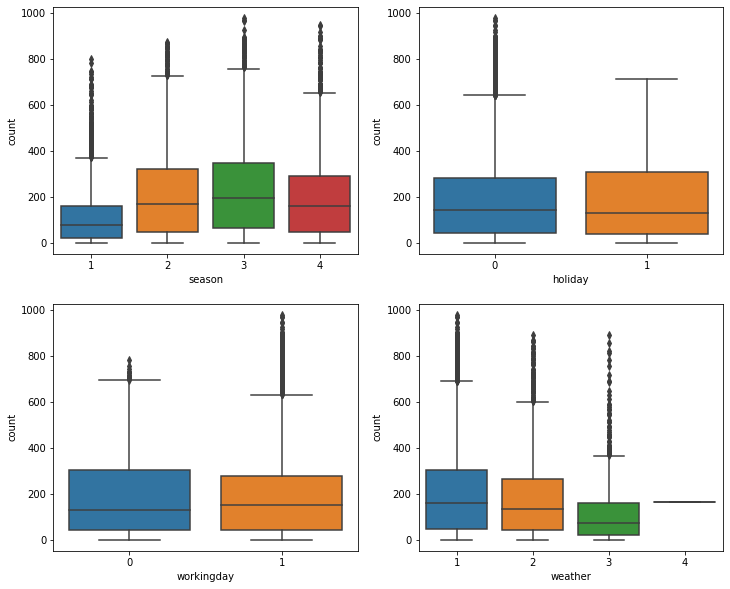

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(12, 10)
sn.boxplot(data= train, y="count", x="season", ax = axes[0][0])
sn.boxplot(data= train, y="count", x="holiday", ax = axes[0][1])
sn.boxplot(data= train, y="count", x="workingday", ax = axes[1][0])
sn.boxplot(data= train, y="count", x="weather", ax = axes[1][1])

- Remove outliers in the dataset

In [12]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.72)
IQR = Q3 - Q1
train_without = train[~((train < (Q1 - 1.5 * IQR)) | (train > (Q3 + 1.5 * IQR))).any(axis=1)]

In [13]:
print ("Shape Of The Before Ouliers: ",train.shape)
print ("Shape Of The After Ouliers: ",train_without.shape)

Shape Of The Before Ouliers:  (10886, 15)
Shape Of The After Ouliers:  (8972, 15)


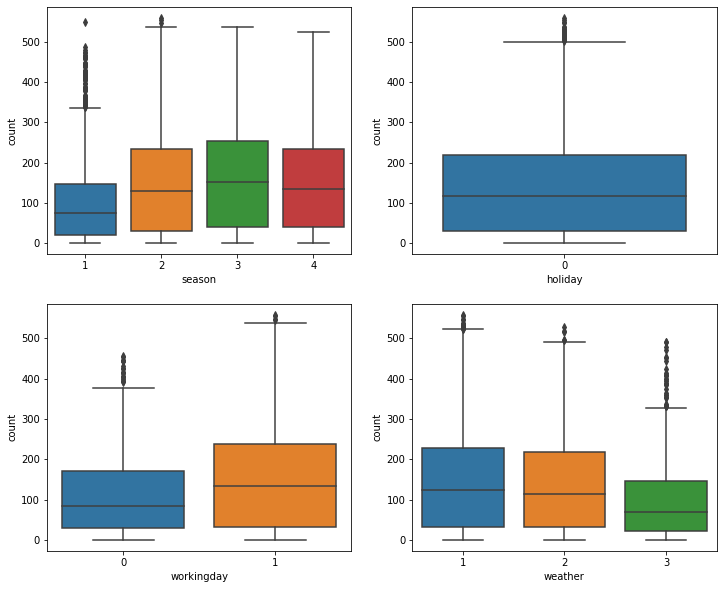

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(12, 10)
sn.boxplot(data= train_without, y="count", x="season", ax = axes[0][0])
sn.boxplot(data= train_without, y="count", x="holiday", ax = axes[0][1])
sn.boxplot(data= train_without, y="count", x="workingday", ax = axes[1][0])
sn.boxplot(data= train_without, y="count", x="weather", ax = axes[1][1])

###### Correlation Analysis
- atemp and temp has positive correlation with each other.
- humidity has negative correlation with count
- Here we consider "count" vs "atemp", "temp", "humidity"
- windspeed has a lot of zero datas.

In [42]:
train_without.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


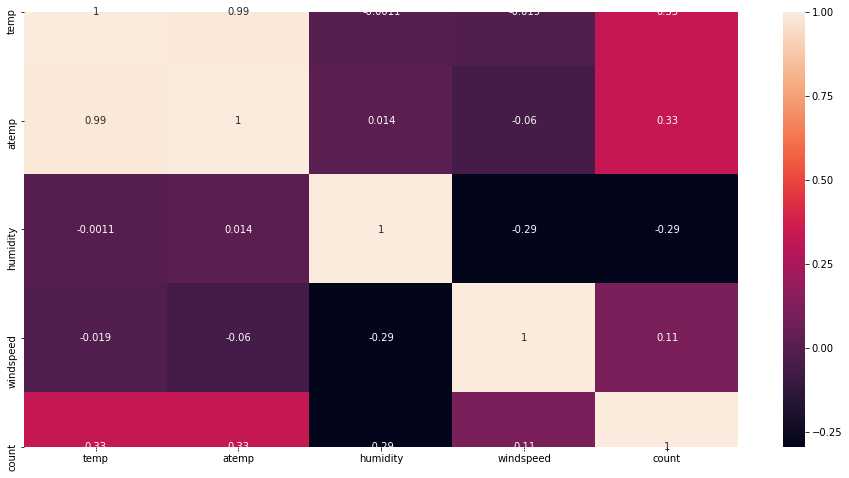

In [16]:
plt.figure(figsize=(16,8))
sn.heatmap(train_without[["temp", "atemp", "humidity", "windspeed", "count"]].corr(), annot=True)
plt.show()

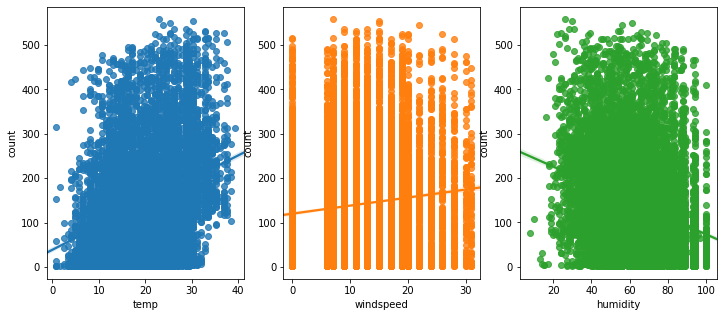

In [17]:
fig,(ax1, ax2, ax3) = plt.subplots(ncols =3)
fig.set_size_inches(12, 5)
sn.regplot(x="temp", y="count", data=train_without, ax=ax1)
sn.regplot(x="windspeed", y="count", data=train_without, ax=ax2)
sn.regplot(x="humidity", y="count", data=train_without, ax=ax3)

- Windspeed has plent of zero numbers

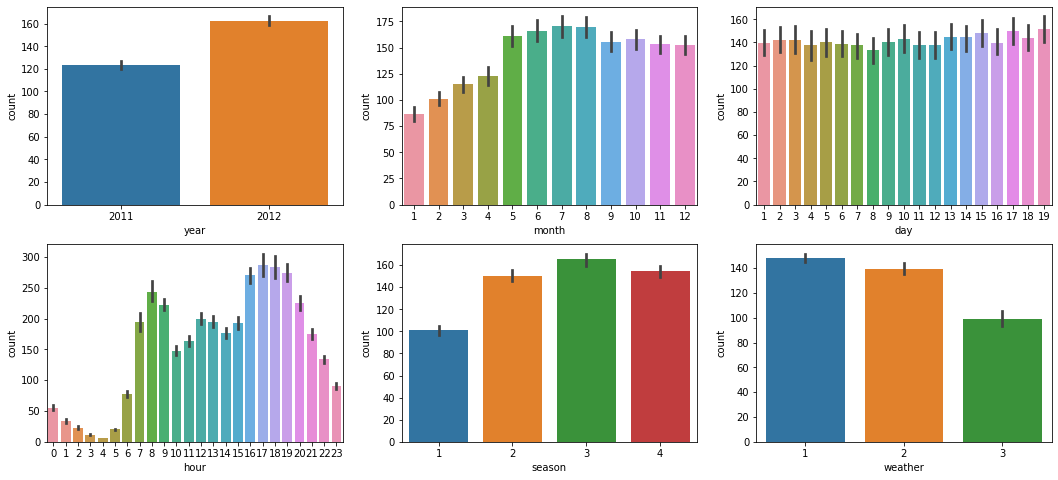

In [18]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18, 8)

sn.barplot(data=train_without, x="year", y="count", ax=ax1)
sn.barplot(data=train_without, x="month", y="count", ax=ax2)
sn.barplot(data=train_without, x="day", y="count", ax=ax3)
sn.barplot(data=train_without, x="hour", y="count", ax=ax4)
sn.barplot(data=train_without, x="season", y="count", ax=ax5)
sn.barplot(data=train_without, x="weather", y="count", ax=ax6)

 - 2012 has more count than 2011
 - day of data is not enough to use

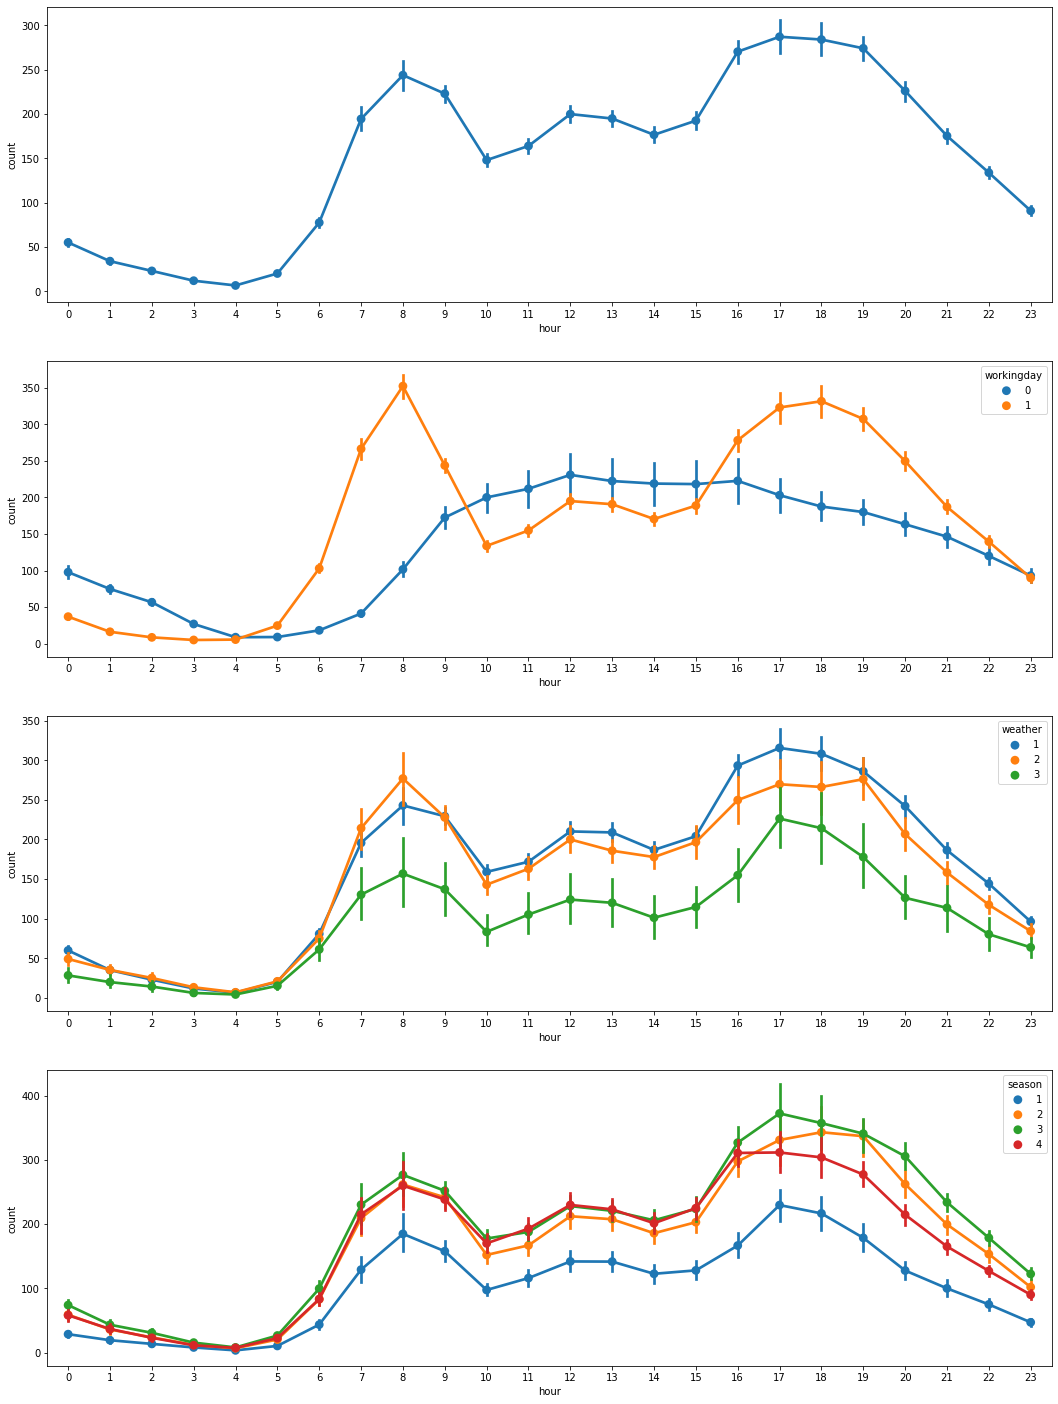

In [19]:
figure, ((ax1, ax2, ax3, ax4)) = plt.subplots(nrows=4)
figure.set_size_inches(18,25)

sn.pointplot(data=train_without, x="hour", y="count", ax=ax1)
sn.pointplot(data=train_without, x="hour", y="count", hue="workingday", ax=ax2)
sn.pointplot(data=train_without, x="hour", y="count", hue="weather",ax=ax3)
sn.pointplot(data=train_without, x="hour", y="count", hue="season",ax=ax4)

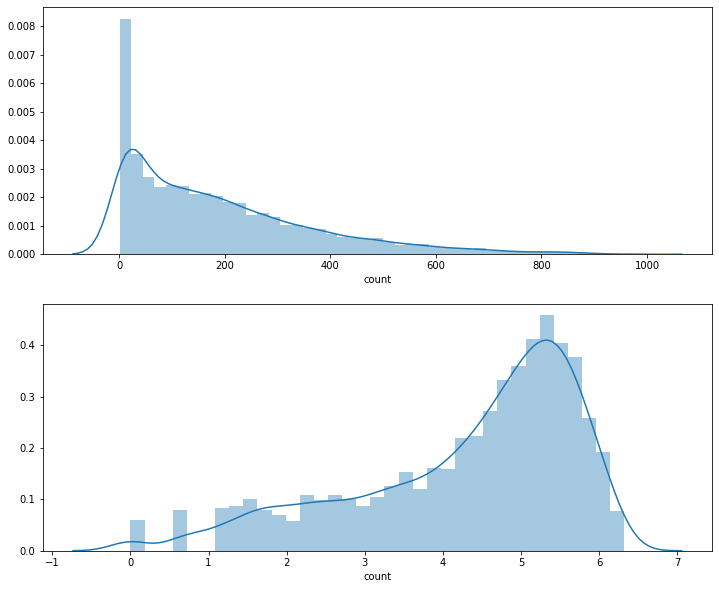

In [23]:
figure, (ax1, ax2) = plt.subplots(nrows=2)
figure.set_size_inches(12,10)

sn.distplot(train["count"], ax=ax1)
sn.distplot(np.log(train_without["count"]), ax=ax2)

## Feature Engineering

In [68]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [69]:
data = train.append(test)
data.reset_index(inplace=True)
data.drop('index', inplace=True, axis=1)

In [70]:
data.dtypes

atemp         float64
casual        float64
count         float64
datetime       object
holiday         int64
humidity        int64
registered    float64
season          int64
temp          float64
weather         int64
windspeed     float64
workingday      int64
dtype: object

In [71]:
data.datetime = pd.to_datetime(data.datetime)
data['year']= data['datetime'].dt.year
data['month'] = data['datetime'].dt.month
data['hour'] = data['datetime'].dt.hour

###### To predict Windspeed using Random Forest Model

In [72]:
data.head()

,atemp,casual,count,datetime,holiday,humidity,registered,season,temp,weather,windspeed,workingday,year,month,hour
0,14.395,3.0,16.0,2011-01-01 00:00:00,0,81,13.0,1,9.84,1,0.0,0,2011,1,0
1,13.635,8.0,40.0,2011-01-01 01:00:00,0,80,32.0,1,9.02,1,0.0,0,2011,1,1
2,13.635,5.0,32.0,2011-01-01 02:00:00,0,80,27.0,1,9.02,1,0.0,0,2011,1,2
3,14.395,3.0,13.0,2011-01-01 03:00:00,0,75,10.0,1,9.84,1,0.0,0,2011,1,3
4,14.395,0.0,1.0,2011-01-01 04:00:00,0,75,1.0,1,9.84,1,0.0,0,2011,1,4


In [73]:
from sklearn.ensemble import RandomForestRegressor

wind_zero = data[data["windspeed"] == 0]
wind_notzero = data[data["windspeed"] != 0]
wind_model = RandomForestRegressor()
windColumns = ["season", "weather", "temp", "atemp", "humidity", "year", "month"]
wind_model.fit(wind_notzero[windColumns], wind_notzero["windspeed"])

wind_values = wind_model.predict(X=wind_zero[windColumns])
wind_zero["windspeed"] = wind_values
data = wind_notzero.append(wind_zero)
data.reset_index(inplace=True)
data.drop('index', inplace=True, axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [74]:
data.head()

,atemp,casual,count,datetime,holiday,humidity,registered,season,temp,weather,windspeed,workingday,year,month,hour
0,12.880,0.0,1.0,2011-01-01 05:00:00,0,75,1.0,1,9.84,2,6.0032,0,2011,1,5
1,19.695,12.0,36.0,2011-01-01 10:00:00,0,76,24.0,1,15.58,1,16.9979,0,2011,1,10
2,16.665,26.0,56.0,2011-01-01 11:00:00,0,81,30.0,1,14.76,1,19.0012,0,2011,1,11
3,21.210,29.0,84.0,2011-01-01 12:00:00,0,77,55.0,1,17.22,1,19.0012,0,2011,1,12
4,22.725,47.0,94.0,2011-01-01 13:00:00,0,72,47.0,1,18.86,2,19.9995,0,2011,1,13


###### Coercing To Categorical Type

In [77]:
categoricalFeature = ["season", "holiday", "workingday", "weather", "year", "month", "hour"]
numericalFeature = ["atemp", "temp", "windspeed", "humidity"]
dropFeature = ["casual", "count", "registered"]

In [78]:
for var in categoricalFeature :
    data[var] = data[var].astype("category")

###### Splitting Train and Test Data

In [106]:
dataTrain = data[pd.notnull(data['count'])]
dataTest = data[~pd.notnull(data['count'])]
yLabel = np.log1p(dataTrain["count"])

dataTrain = dataTrain.drop(dropFeature, axis=1)
dataTest = dataTest.drop(dropFeature, axis=1)
data_Feature = ["season", "holiday", "workingday", "weather", "year", "month", "hour", "atemp", "temp", "windspeed", "humidity"]

### Linear Regression Model

In [107]:
from sklearn.linear_model import LinearRegression

Model = LinearRegression()
Model.fit(X = dataTrain[data_Feature], y = yLabel)
preds = Model.predict(X = dataTrain[data_Feature])

In [108]:
preds

array([2.75713755, 3.57441444, 3.49866264, ..., 4.09645325, 6.03216103,
       3.63758061])

In [109]:
preds = Model.predict(X = dataTest[data_Feature])
preds

array([2.51899437, 2.79187208, 2.89005918, ..., 4.82394933, 6.08770716,
       5.83136969])

In [110]:
preds = preds.reshape(-1, 1)

In [111]:
preds = pd.DataFrame(preds, columns=['count'])

In [112]:
dataTest.reset_index(inplace=True)

In [113]:
df = pd.concat([dataTest['datetime'], preds], axis=1)

In [114]:
df.head()
df['count'] = df['count'].astype('int')

In [115]:
df.to_csv('submission1.csv', index=False)